In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Prajna/Desktop/Loan_Predict/test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df.shape

(367, 12)

In [5]:
df.drop(['Loan_ID'],axis =1,inplace=True)

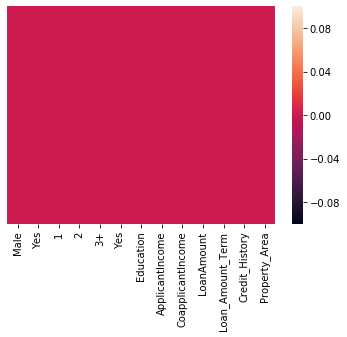

In [22]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 23.0+ KB


In [23]:
df.isnull().sum()

Male                 0
Yes                  0
1                    0
2                    0
3+                   0
Yes                  0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [9]:
print(df.Gender.unique())
print(df.Married.unique())
print(df.Dependents.unique())
print(df.Self_Employed.unique())
print(df.LoanAmount.unique())
print(df.Loan_Amount_Term.unique())
print(df.Credit_History.unique())

['Male' 'Female' nan]
['Yes' 'No']
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[110. 126. 208. 100.  78. 152.  59. 147. 280. 123.  90. 162.  40. 166.
 124. 131. 200. 300.  48.  28. 101. 125. 290. 148. 140. 275.  57.  75.
 192. 158. 176. 185. 116. 138.  84. 108. 187. 120. 160.  30.  92. 130.
 134. 189. 135. 188.  95.  65. 139. 232. 144. 155. 186.  50.  nan 163.
 360. 149. 257. 102.  77. 390. 256.  61. 107. 119. 165.  93. 122. 157.
 180.  80. 104. 213. 146.  71. 225.  70. 132. 105.  83. 103. 150. 550.
 260. 199. 113. 117.  72. 214. 133. 143. 209. 170.  94.  79. 159. 173.
 235. 336.  96. 128. 412. 114. 115.  88.  55. 118. 212.  74.  66.  64.
 142. 151.  81. 171. 234. 184. 112.  49.  99. 240. 460. 297. 106. 141.
 145. 177.  68. 183. 121. 153.  67. 181.  35.  46.  87. 137. 254. 109.
 197.  85.  60.  76.  98.]
[360. 240. 180.  nan  60. 480.  84.  12. 300. 350.  36. 120.   6.]
[ 1. nan  0.]


In [10]:
print(df.Education.unique())
print(df.Property_Area.unique())

['Graduate' 'Not Graduate']
['Urban' 'Semiurban' 'Rural']


In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,0,No,5720,0,110.0,360.0,1.000000,2
1,Male,Yes,1,0,No,3076,1500,126.0,360.0,1.000000,2
2,Male,Yes,2,0,No,5000,1800,208.0,360.0,1.000000,2
3,Male,Yes,2,0,No,2340,2546,100.0,360.0,0.825444,2
4,Male,No,0,1,No,3276,0,78.0,360.0,1.000000,2


In [14]:
df1 = pd.get_dummies(df['Gender'],drop_first=True)
df.drop(['Gender'],axis=1,inplace=True)
df1.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [15]:
df2 = pd.get_dummies(df['Married'],drop_first=True)
df.drop(['Married'],axis=1,inplace=True)
df2.head()

,Yes
0,1
1,1
2,1
3,1
4,0


In [16]:
df3 = pd.get_dummies(df['Dependents'],drop_first=True)
df.drop(['Dependents'],axis=1,inplace=True)
df3.head()

,1,2,3+
0,0,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,0


In [17]:
df4 = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df4.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [18]:
df=pd.concat([df1,df2,df3,df4,df],axis=1)

In [19]:
df.head()

,Male,Yes,1,2,3+,Yes,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,0,1,0,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,0,1,0,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,0,0,0,1,3276,0,78.0,360.0,1.000000,2


In [20]:
df.shape

(367, 13)

In [21]:
# Store it into .csv file for prediction after Model Building
df.to_csv('C:/Users/Prajna/Desktop/Loan_Predict/new_test.csv',index=False)